In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cull7

Looking in indexes: https://download.pytorch.org/whl/cull7
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64" (from torch) (from versions: none)
ERROR: No matching distribution found for nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64"


In [2]:
url= "https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/refs/heads/main/twitter_training.csv"

import pandas as pd
df=pd.read_csv(url)

df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
# Assigning column names
df.columns = ['Tweet_id', 'Location', 'Review', 'Tweets']
print(df)

       Tweet_id     Location    Review  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74676      9200       Nvidia  Positive   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   

                                                  Tweets  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized th

In [4]:
df.shape

(74681, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_id  74681 non-null  int64 
 1   Location  74681 non-null  object
 2   Review    74681 non-null  object
 3   Tweets    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

,0
Tweet_id,0
Location,0
Review,0
Tweets,686


In [7]:
#duplicate
df.duplicated().sum()

np.int64(2700)

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [9]:
df.drop(columns=['Tweet_id', 'Location'], inplace=True)

In [10]:
# Replace "Irrelevant" with "Neutral"
df['Review'] = df['Review'].replace('Irrelevant', 'Neutral')

# Label Encoding
sentiment_mapping = {'Positive': 1, 'Negative': 2, 'Neutral': 0}
df['Review'] = df['Review'].map(sentiment_mapping)

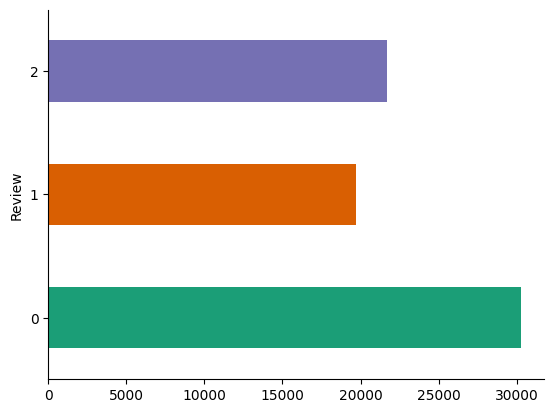

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df.to_csv(r"E:\NLP\Final_Project\Cleaned_Dataset\Cleaned_Tweets_dataset.csv", index=False)

In [13]:
!pip install torch transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
import torch
torch.cuda.is_available()

True

In [15]:
device = torch.device("cuda")

In [16]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load your preprocessed dataset
df = pd.read_csv(r"E:\NLP\Final_Project\Cleaned_Dataset\Cleaned_Tweets_dataset.csv")  # Replace with actual file path

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Tweets'], df['Review'], test_size=0.2, random_state=42
)

# Convert the 'text' column to strings before creating the Dataset
train_texts = train_texts.astype(str)
val_texts = val_texts.astype(str)
# Convert to Dataset objects
train_data = Dataset.from_dict({"text": train_texts, "label": train_labels})
val_data = Dataset.from_dict({"text": val_texts, "label": val_labels})

In [17]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)

# Remove unnecessary columns for training
train_data = train_data.remove_columns(['text'])
val_data = val_data.remove_columns(['text'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/57324 [00:00<?, ? examples/s]

Map:   0%|          | 0/14331 [00:00<?, ? examples/s]

In [18]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3  # Number of sentiment classes (Positive, Negative, Neutral)
)
model = model.to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [20]:
# Create a PyTorch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [22]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    fp16=True
)

In [23]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Stop if no improvement after 2 epochs
)

# Train the model
trainer.train()

<ipython-input-23-f6a25e5a0fd7>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: harikrishnapanneerselvam (harikrishnapanneerselvam-ab-company) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.501900,0.439645,0.831414,0.831382,0.831414,0.831176
2,0.239500,0.308414,0.891215,0.893212,0.891215,0.891049
3,0.231500,0.333436,0.908590,0.908905,0.908590,0.908533


TrainOutput(global_step=10749, training_loss=0.3668013331540541, metrics={'train_runtime': 2483.7383, 'train_samples_per_second': 69.239, 'train_steps_per_second': 4.328, 'total_flos': 2.278108974281933e+16, 'train_loss': 0.3668013331540541, 'epoch': 3.0})

In [24]:
results = trainer.evaluate()
print("Evaluation Results:", results)

Evaluation Results: {'eval_loss': 0.30841365456581116, 'eval_accuracy': 0.8912148489288954, 'eval_precision': 0.8932118372584001, 'eval_recall': 0.8912148489288954, 'eval_f1': 0.8910492813036821, 'eval_runtime': 57.1504, 'eval_samples_per_second': 250.76, 'eval_steps_per_second': 15.678, 'epoch': 3.0}


In [25]:
model.save_pretrained("E:/NLP/Final_Project/Model./fine_tuned_distilbert")
tokenizer.save_pretrained("E:/NLP/Final_Project/Model./fine_tuned_distilbert")

('E:/NLP/Final_Project/Model./fine_tuned_distilbert/tokenizer_config.json',
 'E:/NLP/Final_Project/Model./fine_tuned_distilbert/special_tokens_map.json',
 'E:/NLP/Final_Project/Model./fine_tuned_distilbert/vocab.txt',
 'E:/NLP/Final_Project/Model./fine_tuned_distilbert/added_tokens.json')

In [26]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import torch.nn.functional as F

# Load fine-tuned model and tokenizer
model_path = "E:/NLP/Final_Project/Model./fine_tuned_distilbert"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [27]:
def predict_sentiment(texts):
    # Tokenize input texts
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = F.softmax(outputs.logits, dim=-1)

    # Get class probabilities and format the output
    results = []
    for i, prob in enumerate(probs):
        result = {
            "Text": texts[i],
            "Probabilities": {
                "Neutral": round(prob[0].item(), 4),
                "Positive": round(prob[1].item(), 4),
                "Negative": round(prob[2].item(), 4)
            }
        }
        results.append(result)
    return results

In [28]:
texts = [
    "I love this product!",
    "This is the worst experience ever.",
    "guvi has the best data science road map in industry"
]

predictions = predict_sentiment(texts)

# Display results
for prediction in predictions:
    print(f"Text: {prediction['Text']}")
    for sentiment, prob in prediction["Probabilities"].items():
        print(f"  {sentiment}: {prob}")
    print()

Text: I love this product!
  Neutral: 0.1117
  Positive: 0.854
  Negative: 0.0343

Text: This is the worst experience ever.
  Neutral: 0.0666
  Positive: 0.0261
  Negative: 0.9073

Text: guvi has the best data science road map in industry
  Neutral: 0.7686
  Positive: 0.2272
  Negative: 0.0042



In [29]:
!pip install flask

In [32]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [33]:
import gradio as gr
import torch
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from flask import request
import logging
from datetime import datetime

# Load fine-tuned model and tokenizer
model_path = "E:/NLP/Final_Project/Model./fine_tuned_distilbert"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Set up logging
logging.basicConfig(
    filename="user_logs.txt",  # Logs will be saved to this file
    level=logging.INFO,
    format="%(asctime)s - %(message)s",
)

def log_user_details(user_ip, input_text):
    log_message = f"IP: {user_ip} | Input: {input_text}"
    logging.info(log_message)
    print(log_message)  # Optional: Print logs for testing in Colab

def predict_sentiment(text):
    # Get user IP address (only works with Flask requests)
    user_ip = request.remote_addr if request else "Unknown IP"
    log_user_details(user_ip, text)

    # Predict sentiment
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = F.softmax(outputs.logits, dim=-1)
    # Get class probabilities and format the output
    result = {
        "Negative": round(probs[0][2].item(), 4),
        "Neutral": round(probs[0][0].item(), 4),
        "Positive": round(probs[0][1].item(), 4),
    }
    return result

iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),
    outputs=gr.JSON(),
    title="Twitter Tweets Sentiment Analysis",
    description="Enter Tweets and get the predicted sentiment probabilities."
)

iface.launch(share=True)  # `share=True` creates a public URL

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f086cdeee6b0b48db2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [36]:
# Read the log file and print its content
log_file_path = "user_logs.txt"

try:
    with open(log_file_path, "r") as log_file:
        logs = log_file.readlines()
        print("User Logs:")
        for line in logs:
            print(line.strip())  # Remove extra newline characters
except FileNotFoundError:
    print(f"Log file '{log_file_path}' not found.")

Log file 'user_logs.txt' not found.
